In [1]:
# Importing usefull libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [2]:
# Importing some scripts

from scripts.data_vizualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
from scripts.data_transformation import DataTransformer

DC = DataCleaner()
DV = Data_Viz()
DT = DataTransformer()

In [3]:
# Reading the datasets

train_data = pd.read_csv('../data/train_store.csv')
test_data = pd.read_csv('../data/test_store.csv')

#### 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
# Finding out the total promotion percentage in both the training and test dataset

promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

In [5]:
# Printing the number of percentages

print(f'There are {promo_test_percentage:.2%} of promotion in the test data set ')
print(f'There are {promo_train_percentage:.2%} of promotion in the train data set ')

There are 39.58% of promotion in the test data set 
There are 38.15% of promotion in the train data set 


In [6]:
# Creating a test and train promo data frame for visualization

promo_test_df = test_data['Promo'].value_counts()
promo_train_df = train_data['Promo'].value_counts()

In [7]:
# Creating a data frame for visualization

test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)

In [8]:
# Renaming the columns for visualization

promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
test_df.rename(columns={'Promo':'Count'},inplace=True)
train_df.rename(columns={'Promo':'Count'},inplace=True)

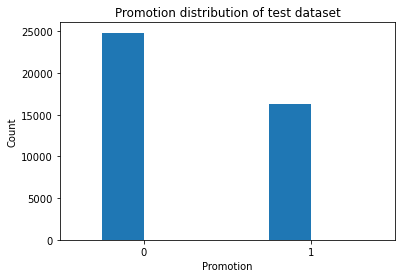

In [9]:
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/test_dataset_promo_distribution.png')

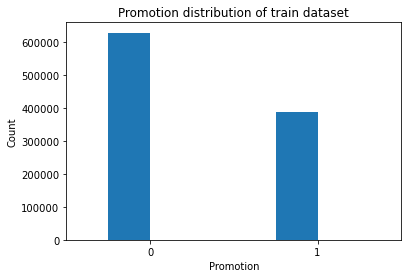

In [10]:
# Plotting the train promo distribution 

train_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of train dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/train_dataset_promo_distribution.png')

##### From the above graphs and percentage prints we can see that the promotion is distributed in both the train and test data similarly

In [11]:
# Finding out the state holiday field

train_data['StateHoliday'].value_counts().index.tolist()

['0', 0, 'a', 'b', 'c']

In [12]:
# Changing all the fields of the state holiday into string

train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

In [13]:
# Changing the state holiday fields to easy understandable names
 
train_data['StateHoliday'].replace({'0':'No Holiday','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)

In [14]:
# Ensuring if the train data column values has changed

train_data['StateHoliday'].value_counts().index.tolist()

['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [15]:
# Separating the date column for further analysis

DC.convert_to_datetime(train_data, ['Date'])
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
train_data['Weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) # Identifying if the day is weekend or weekday

#### 2. Check & compare sales behavior before, during and after holidays

In [16]:
# Droping the date column since already it has been divided into months and days

train_data.drop('Date',axis=1,inplace=True)
train_data.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,Weekday
0,1,5,5263.0,555.0,1,1,No Holiday,1,c,a,...,9.0,2008.0,0,Not Available,Not Available,Not Available,2015,7,31,1
1,2,5,6064.0,625.0,1,1,No Holiday,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,1
2,3,5,8314.0,821.0,1,1,No Holiday,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,1


In [17]:
# Create a new analysed train_data

train_data.to_csv('../data/train_data_clean.csv',index=False)